In [ ]:
from tensorflow import keras
from tensorflow.keras.datasets import mnist
from tensorflow.keras.layers import Dense,Dropout
from tensorflow.keras.models import Sequential


In [ ]:
(train_x, train_y) , (test_x, test_y) = mnist.load_data()


In [ ]:
train_x = train_x.astype('float32') / 255 # Similar to feature scaling
test_x = test_x.astype('float32') / 255


print(train_x.shape)
print(train_y.shape)
print(test_x.shape)
print(test_y.shape)


(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


In [ ]:
# Preparing the dataset
train_x = train_x.reshape(60000,784)
test_x = test_x.reshape(10000,784)

train_y = keras.utils.to_categorical(train_y,10)
test_y = keras.utils.to_categorical(test_y,10)



In [ ]:
model = Sequential()
model.add(Dense(units=256,activation="relu",input_shape=(784,)))
model.add(Dropout(0.4))

model.add(Dense(units=128,activation="relu"))
model.add(Dropout(0.3))

model.add(Dense(units=128,activation="relu"))
model.add(Dropout(0.4))

model.add(Dense(units=64,activation="relu"))
model.add(Dropout(0.4))

model.add(Dense(units=10,activation="softmax"))

In [ ]:
model.compile(optimizer='Adam',loss="categorical_crossentropy",metrics=["accuracy"])



In [ ]:
H=model.fit(train_x,train_y,batch_size=2048,epochs=100)

Epoch 1/100
30/30 [==============================] - 0s 7ms/step - loss: 1.8111 - accuracy: 0.3675
Epoch 2/100
30/30 [==============================] - 0s 7ms/step - loss: 0.7959 - accuracy: 0.7490
Epoch 3/100
30/30 [==============================] - 0s 7ms/step - loss: 0.4562 - accuracy: 0.8716
Epoch 4/100
30/30 [==============================] - 0s 6ms/step - loss: 0.3482 - accuracy: 0.9071
Epoch 5/100
30/30 [==============================] - 0s 7ms/step - loss: 0.2803 - accuracy: 0.9262
Epoch 6/100
30/30 [==============================] - 0s 6ms/step - loss: 0.2472 - accuracy: 0.9372
Epoch 7/100
30/30 [==============================] - 0s 7ms/step - loss: 0.2212 - accuracy: 0.9436
Epoch 8/100
30/30 [==============================] - 0s 7ms/step - loss: 0.1989 - accuracy: 0.9492
Epoch 9/100
30/30 [==============================] - 0s 7ms/step - loss: 0.1803 - accuracy: 0.9526
Epoch 10/100
30/30 [==============================] - 0s 7ms/step - loss: 0.1637 - accuracy: 0.9575
Epoch 11/

In [ ]:
accuracy = model.evaluate(x=test_x,y=test_y,batch_size=1024)

print("Accuracy: ",accuracy[1])

10/10 [==============================] - 0s 3ms/step - loss: 0.0871 - accuracy: 0.9835
Accuracy:  0.9835000038146973


In [ ]:
H.history.keys() # To check which information does it contain

dict_keys(['loss', 'accuracy'])

In [ ]:
H.history['accuracy']

[0.36748334765434265,
 0.7489666938781738,
 0.8715833425521851,
 0.9070666432380676,
 0.9261833429336548,
 0.9372166395187378,
 0.9435999989509583,
 0.94923335313797,
 0.9526166915893555,
 0.9574833512306213,
 0.9616833329200745,
 0.9630666375160217,
 0.9659500122070312,
 0.9667500257492065,
 0.9684666395187378,
 0.9698166847229004,
 0.9714999794960022,
 0.9741833209991455,
 0.9749833345413208,
 0.9750000238418579,
 0.9757166504859924,
 0.9762333035469055,
 0.9771833419799805,
 0.9778666496276855,
 0.9806166887283325,
 0.9803166389465332,
 0.9805499911308289,
 0.98048335313797,
 0.9815666675567627,
 0.9815666675567627,
 0.9829166531562805,
 0.9839666485786438,
 0.9830333590507507,
 0.9831833243370056,
 0.9840166568756104,
 0.9846833348274231,
 0.9840166568756104,
 0.9850000143051147,
 0.9853666424751282,
 0.9858666658401489,
 0.9862333536148071,
 0.9880333542823792,
 0.9870333075523376,
 0.9876333475112915,
 0.9880499839782715,
 0.9871000051498413,
 0.9874666929244995,
 0.9874666929244

In [ ]:
import plotly.express as px

px.line(y=H.history['accuracy'],title='Accuracy')

In [ ]:
px.line(y=H.history['loss'],title='Loss')

## Predictions for your images (optional)

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive/


In [ ]:
%cd /content/drive/My Drive/Colab Notebooks/ML_and_NN_course/module 3

/content/drive/My Drive/Colab Notebooks/ML_and_NN_course/module 3


In [ ]:
from utils import *

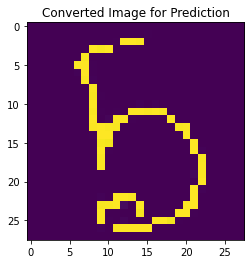

Predictions for each class [[1.9856884e-06 1.2487728e-06 3.9514951e-08 5.7791563e-05 1.8741062e-08
  9.9983048e-01 3.4651450e-05 5.6732684e-08 6.5370114e-05 8.3998102e-06]]
Predicted value is 5


In [ ]:
predict('images/num_15.jpg',model=model,con_dest='images/con_num_15.jpg')